In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

### Logistic Regression from scratch, demonstrating it both on Gradient and Stochastic gradient descent.

In [7]:
d=2

mean_cluster_one = [0.5,0.5]
mean_cluster_two = [-0.5,-0.5]

cov = [[0.05,0],[0,0.05]]

# getting random gaussian points from the computed mean and covariance
cluster_one = np.random.multivariate_normal(mean_cluster_one, cov, (100,1))
cluster_two = np.random.multivariate_normal(mean_cluster_two, cov, (100,1))




## Plotting the generated points

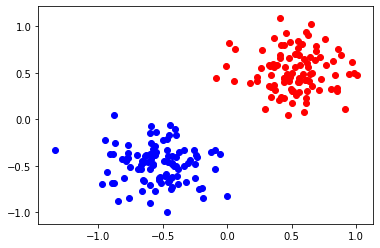

(200, 2)
(200, 1)
(160, 2)


In [8]:
#showing scatter plot of clusters
x_one, y_one = cluster_one.T
x_two, y_two = cluster_two.T

y_label_one = [1]*100
y_label_two = [-1]*100

plt.scatter(x_one,y_one,c='red')
plt.scatter(x_two, y_two,c='blue')
plt.show()

#preparing data

X=np.concatenate((cluster_one, cluster_two),axis=0).reshape(200,2)
y=np.concatenate((y_label_one, y_label_two),axis=0).reshape(200,1)

# sanity check
print(X.shape)
print(y.shape)

# Dividing into test train split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20)

print(X_train.shape)

### GD

In [9]:
class LogisticRegressionWithGD:
    def __init__(self, dimensions, alpha, epochs):
        # intialize weights
        self.w = np.zeros((dimensions, 1))
        self.alpha = alpha # Learning rate
        self.epochs = epochs # Iterations/epochs T
        # Cost function values during the training
        self.costs_train = []
    

    def sigmoid(self, a):
        return 1 / (1 + np.exp(-a))
    
    def fit(self, X, y):
        converged=False
        n_samples, n_features = X.shape
        for epoch in np.arange(1, self.epochs+1):
            
            # Predictions
            preds = self.sigmoid(np.dot(X, self.w))
            
            # Costs
            cost_value = self.cost(preds, y, n_samples)        

            # Storing the costs
            self.costs_train.append(cost_value)
            
            # Finding the Derivatives
            dw = (1 / n_samples) * np.dot(X.T, (preds - y))
            # Updating parameters
            self.update(dw)
            if cost_value < 0:
                converged = True
                break    
        return self.w, self.costs_train, preds
    
    # updating weights
    def update(self, dw):
        self.w = self.w - self.alpha * dw
        
    # Model prediction
    def predict(self, X):
        preds = self.sigmoid(np.dot(X, self.w))
        predict_labels = [1 if elem > 0.5 else -1 for elem in preds]

        return np.array(predict_labels)[:, np.newaxis]
    
    def cost(self, preds, y, n_samples):
        Cost = (- 1 / n_samples) * np.sum(y * np.log(preds) + (1 - y) * (np.log(1 - preds)))
        return Cost

In [10]:
iterations = 900
print(X_train.shape)
regressor = LogisticRegressionWithGD(X_train.shape[1], 0.01, iterations)
weights, costs, predictions = regressor.fit(X_train,y_train)

prediction_train_labels = regressor.predict(X_train)
prediction_test_labels = regressor.predict(X_test)

(160, 2)


### Error Plot

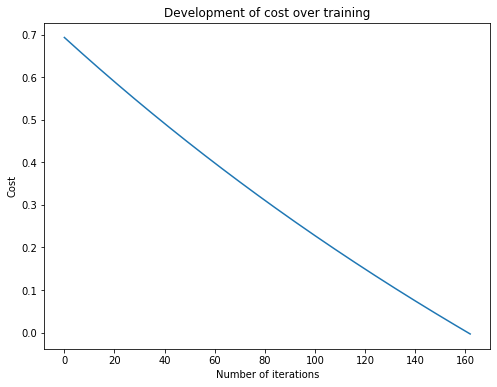

No. of iterations 163


In [11]:
fig = plt.figure(figsize=(8,6))
plt.plot(np.arange(len(costs)), costs)
plt.title("Development of cost over training")
plt.xlabel("Number of iterations")
plt.ylabel("Cost")
plt.show()


print("No. of iterations {}".format(len(costs)))

### SGD

In [12]:
from random import sample
class LogisticRegressionWithSGD:
    def __init__(self, dimensions, alpha, epochs, batch_size):
        # intialize weights
        self.w = np.zeros((dimensions, 1))
        self.alpha = alpha # Learning rate
        self.epochs = epochs # Iterations/epochs T
        self.batch_size=batch_size
        # Cost function values during the training
        self.costs_train = []
    

    def sigmoid(self, a):
        return 1 / (1 + np.exp(-a))
    
    def fit(self, X_train, y_train):
        data = np.concatenate((X_train, y_train),axis=1)
        converged = False
        for i in range(self.epochs):

            # sampling over the data set
            sample_data = sample(data.tolist(), self.batch_size)
            
            y_sample = np.delete(sample_data,np.s_[:2],axis=1)
            X_sample = np.delete(sample_data,np.s_[2:],axis=1)
            
            n_samples, n_features = X_sample.shape
            
            # Computing predictions and cost value for the present weights
            preds = self.sigmoid(np.dot(X_sample, self.w))
            
            cost_value = self.cost(preds, y_sample, n_samples)
            
            self.costs_train.append(cost_value)
            
            # Computing and then updating weights for the given batch_size
            dw = (1 / n_samples) * np.dot((X_sample.T), (preds - y_sample))

            self.update(dw)
            
            if cost_value < 0:
                converged = True
                break
        return self.w, self.costs_train

    # updating weights
    def update(self, dw):
        self.w = self.w - self.alpha * dw
        
    # Model prediction
    def predict(self, X):
        preds = self.sigmoid(np.dot(X, self.w))
        predict_labels = [1 if elem > 0.5 else -1 for elem in preds]

        return np.array(predict_labels)[:, np.newaxis]
    
    
    def cost(self, preds, y, n_samples):
        Cost = (- 1 / n_samples) * np.sum(y * np.log(preds) + (1 - y) * (np.log(1 - preds)))
        return Cost

In [13]:
iterations_sgd = 5200
regressor_sgd = LogisticRegressionWithSGD(X_train.shape[1], 0.01, iterations_sgd, 10)
weights_sgd, costs_sgd = regressor_sgd.fit(X_train,y_train)

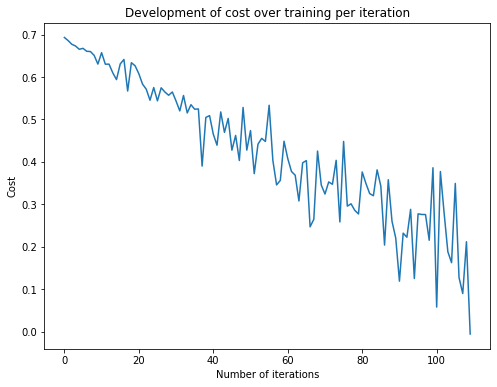

No. of iterations 110


In [14]:
fig = plt.figure(figsize=(8,6))
plt.plot(np.arange(len(costs_sgd)), costs_sgd)
plt.title("Development of cost over training per iteration")
plt.xlabel("Number of iterations")
plt.ylabel("Cost")
plt.show()
print("No. of iterations {}".format(len(costs_sgd)))

### We can see that  SGD exhibits a slower rate of convergence than GD, but is faster per-iteration, and does not suffer in terms of final quality.

### Plotting the models obtained from the weights.

Weights from SGD
[[0.55064461]
 [0.50972037]]
Weights from GD
[[0.78837949]
 [0.7178012 ]]


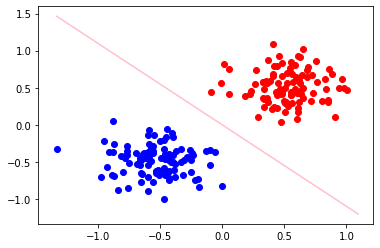

In [15]:

print("Weights from SGD")
print(weights_sgd)
print("Weights from GD")
print(weights)

x_values = [np.max(cluster_one), np.min(cluster_two)]
y_values_gd = - (np.dot(weights[0][0], x_values)) / weights[1][0]
y_values_sgd = - (np.dot(weights_sgd[0][0], x_values)) / weights_sgd[1][0]

plt.plot(x_values, y_values_gd, c='pink')

plt.scatter(x_one,y_one,c='red')
plt.scatter(x_two, y_two,c='blue')
plt.show()


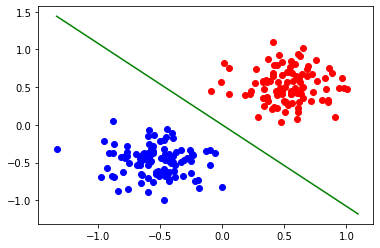

In [16]:

plt.plot(x_values, y_values_sgd, c='green')

plt.scatter(x_one,y_one,c='red')
plt.scatter(x_two, y_two,c='blue')
plt.show()